# Scaling , Standardization and Normalization
- Scaling: changing the range of your data, changing the scale (or scaling) won’t change the shape of the data’s distribution
- Standardize: changing the values so that the distribution standard deviation from the mean equals one.This tends to shift the shape of the data towards the shape of a normal distribution
- Normalization: changing the shape of the distribution of your data
- https://medium.com/@sjacks/feature-transformation-21282d1a3215

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from scipy import stats

In [2]:
df=pd.read_csv('X_train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [4]:
df.shape

(384, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             384 non-null    object 
 2   Married            384 non-null    object 
 3   Dependents         384 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      384 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         384 non-null    int64  
 9   Loan_Amount_Term   384 non-null    int64  
 10  Credit_History     384 non-null    int64  
 11  Property_Area      384 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5149.718750,1572.077917,141.471354,342.093750,0.856771
std,5304.921764,2624.223119,75.176271,65.846658,0.350763
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3893.500000,1188.500000,128.000000,360.000000,1.000000
75%,5819.500000,2259.250000,164.250000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Check distribution of all numeric value

<Figure size 288x288 with 0 Axes>

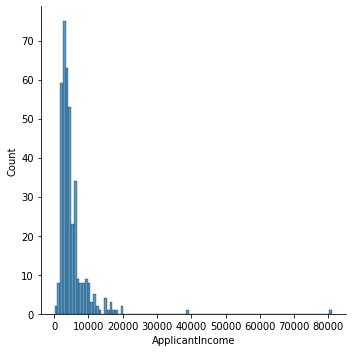

<Figure size 288x288 with 0 Axes>

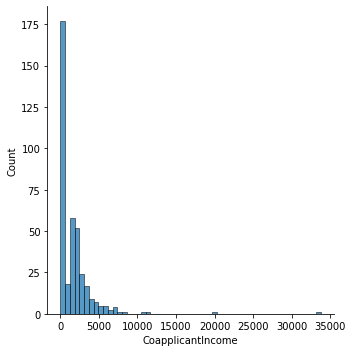

<Figure size 288x288 with 0 Axes>

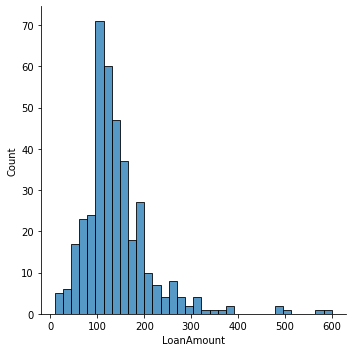

<Figure size 288x288 with 0 Axes>

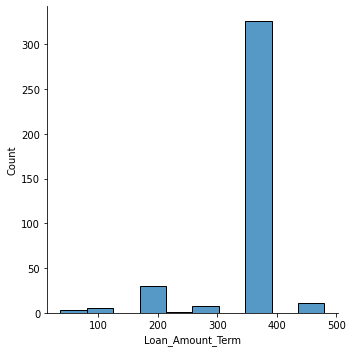

<Figure size 288x288 with 0 Axes>

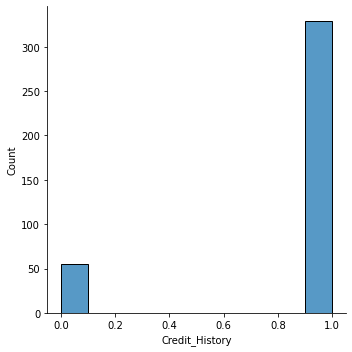

In [8]:
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
    plt.figure(figsize=(4,4))
    sns.displot(df[a])

In [9]:
df.Credit_History.value_counts() #binary

1    329
0     55
Name: Credit_History, dtype: int64

In [10]:
df.Loan_Amount_Term.value_counts() #month

360    326
180     30
480     11
300      8
120      3
60       2
84       2
36       1
240      1
Name: Loan_Amount_Term, dtype: int64

Let check if 'ApplicantIncome','CoapplicantIncome','LoanAmount' have same scale

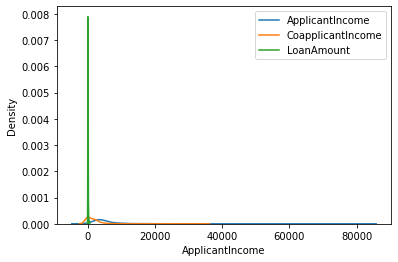

In [11]:
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(df[a],label=a)
    plt.legend()

Check if there is outlier

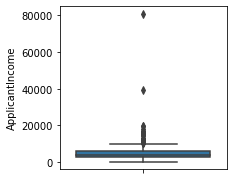

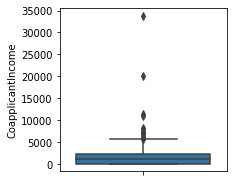

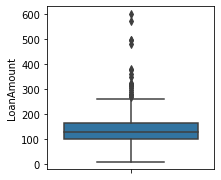

In [12]:
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=df[a])

**1.Log transformation**
- Convert righ-skewed distribution to normal distribution
-  only work on non-zero and non-negative data, and doesn’t transform to a predetermined scale (i.e. always [0–1])

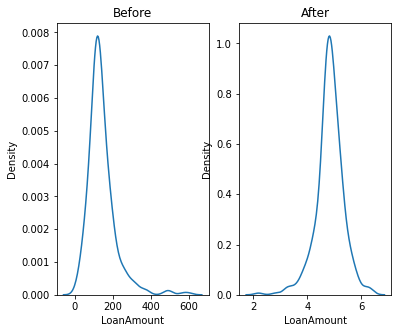

In [13]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before')
sns.kdeplot(df['LoanAmount'],ax=ax1)
ax2.set_title('After')
sns.kdeplot(np.log(df['LoanAmount']),ax=ax2);

**2.Power Transformer**
- Aims to correct skewness in distributions
- There are two options for Power transformation: Yeo-Johnson transform and Box-Cox transform. However, Box-Cox can only be applied to strictly positive data

In [14]:
box_cox_scaled_df = preprocessing.PowerTransformer(method='box-cox', standardize=True).fit_transform(df[['ApplicantIncome','LoanAmount']])

In [15]:
box_cox_scaled_df=pd.DataFrame(box_cox_scaled_df,columns=['ApplicantIncome','LoanAmount'])

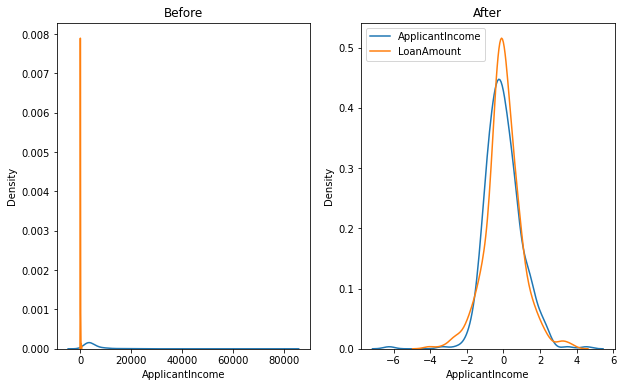

In [16]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10,6))
ax1.set_title('Before')
for a in ['ApplicantIncome','LoanAmount']:
    sns.kdeplot(df[a],ax=ax1,label=a)
ax2.set_title('After')
for a in ['ApplicantIncome','LoanAmount']:
    sns.kdeplot(box_cox_scaled_df[a],ax=ax2,label=a)

plt.legend();

In [17]:
box_cox_scaled_df.agg(['mean','std','min','max']).round(2)

,ApplicantIncome,LoanAmount
mean,0.00,-0.00
std,1.00,1.00
min,-6.25,-4.06
max,4.54,3.71


**3.StandardScaler (z-score normalization)**
- StandardScaler does distort the relative distances between the feature values
- Shoud apply in normal distribution because The standard scaler assumes features are normally distributed
- StandardScaler results in a distribution with a standard deviation equal to 1 and the mean of the distribution 0

In [18]:
z_scaled_df= preprocessing.StandardScaler().fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [19]:
z_scaled_df=pd.DataFrame(z_scaled_df,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

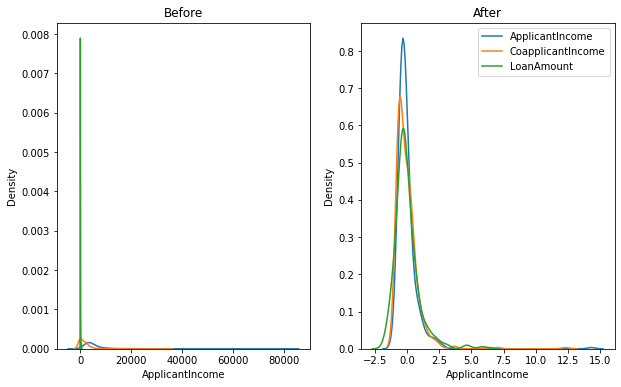

In [20]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10,6))
ax1.set_title('Before')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(df[a],ax=ax1,label=a)
ax2.set_title('After')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(z_scaled_df[a],ax=ax2,label=a)

plt.legend()

In [21]:
z_scaled_df.agg(['max','min','mean','std']).round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount
max,14.32,12.31,6.11
min,-0.94,-0.60,-1.76
mean,0.00,0.00,0.00
std,1.00,1.00,1.00


In [22]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].agg(['max','min','mean','std']).round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount
max,81000.00,33837.00,600.00
min,150.00,0.00,9.00
mean,5149.72,1572.08,141.47
std,5304.92,2624.22,75.18


**4.Normalization**
- The maximum value you can get after applying the formula is 1, and the minimum value is 0
- Normalization is the process of scaling individual samples to have unit norm.
- It is used to rescale each sample. Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.

In [23]:
normalizer= preprocessing.Normalizer() 

In [24]:
n_scaled_df= normalizer.fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [25]:
n_scaled_df=pd.DataFrame(n_scaled_df,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

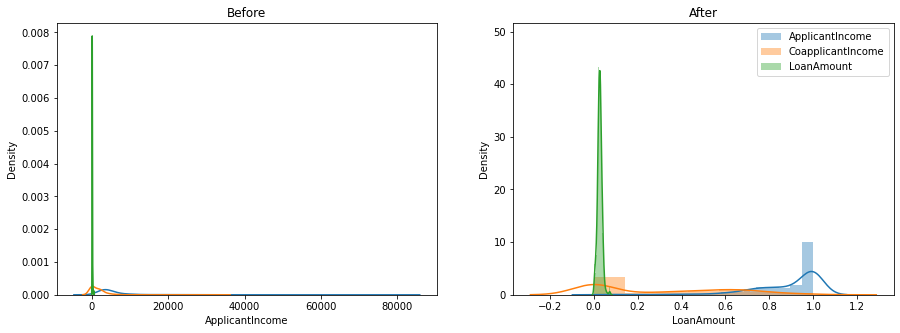

In [26]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15,5))
ax1.set_title('Before')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(df[a],ax=ax1)
ax2.set_title('After')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(n_scaled_df[a],ax=ax2,label=a)
plt.legend()
plt.show()

In [27]:
n_scaled_df.agg(['min','max','mean','std'])

,ApplicantIncome,CoapplicantIncome,LoanAmount
min,0.054180,0.000000,0.002656
max,0.999995,0.998528,0.074533
mean,0.883948,0.302322,0.027922
std,0.165441,0.315144,0.010089


**5.RobustScaler**
- RobustScaler does not scale the data into a predetermined interval like MinMaxScaler
- Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

In [28]:
robust_scaler= preprocessing.RobustScaler()

In [29]:
r_scaled_df= robust_scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [30]:
r_scaled_df=pd.DataFrame(r_scaled_df,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

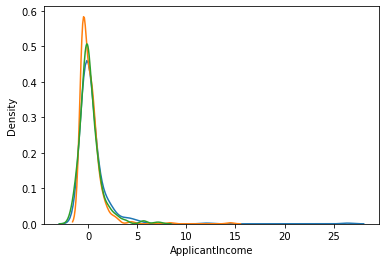

In [31]:
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(r_scaled_df[a])

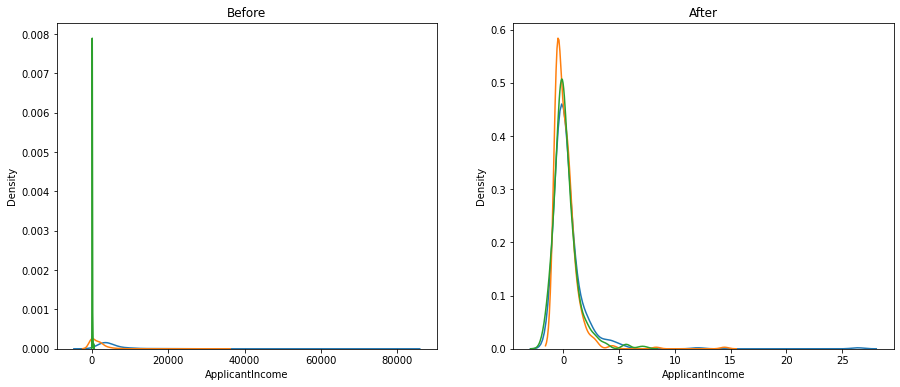

In [32]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15,6))
ax1.set_title('Before')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(df[a],ax=ax1)
ax2.set_title('After')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(r_scaled_df[a],ax=ax2)

In [33]:
r_scaled_df.agg(['max','min','mean','std'])

,ApplicantIncome,CoapplicantIncome,LoanAmount
max,26.399555,14.451035,7.346304
min,-1.281691,-0.526060,-1.852140
mean,0.430101,0.169781,0.209671
std,1.816288,1.161546,1.170059


In [34]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].agg(['max','min','mean','std'])

,ApplicantIncome,CoapplicantIncome,LoanAmount
max,81000.000000,33837.000000,600.000000
min,150.000000,0.000000,9.000000
mean,5149.718750,1572.077917,141.471354
std,5304.921764,2624.223119,75.176271


**6.MinMax Scaler**
- MinMaxScaler subtracts the minimum value in the feature and then divides by the range
- MinMaxScaler preserves the shape of the original distribution.
- The default range for the feature returned by MinMaxScaler is 0 to 1
- Should remove outlier before application

In [35]:
def upper_lower_fence(ds):
    Q1=ds.describe()['25%']
    Q3=ds.describe()['75%']
    iqr=Q3-Q1
    upper= Q3+1.5*iqr
    lower= Q1-1.5*iqr
    return ds[(ds>lower) & (ds<upper)]

In [36]:
df.ApplicantIncome= upper_lower_fence(df.ApplicantIncome)

In [37]:
df.CoapplicantIncome= upper_lower_fence(df.CoapplicantIncome)

In [38]:
df.LoanAmount= upper_lower_fence(df.LoanAmount)

In [39]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      28
CoapplicantIncome    14
LoanAmount           21
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [40]:
df=df.dropna()

In [41]:
minmax_scaler= preprocessing.MinMaxScaler()

In [42]:
m_scaled_df= minmax_scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [43]:
m_scaled_df=pd.DataFrame(m_scaled_df,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

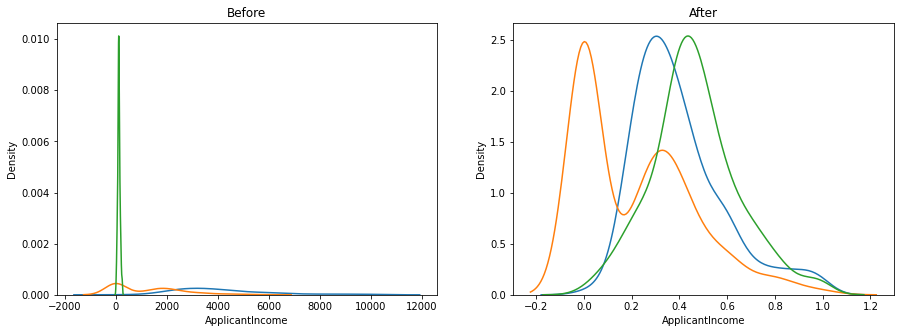

In [44]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15,5))
ax1.set_title('Before')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(df[a],ax=ax1)
ax2.set_title('After')
for a in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.kdeplot(m_scaled_df[a],ax=ax2,label=a)

In [45]:
m_scaled_df.agg(['max','min','mean','std']).round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount
max,1.00,1.00,1.00
min,0.00,0.00,0.00
mean,0.40,0.22,0.46
std,0.19,0.24,0.18


In [46]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].agg(['max','min','mean','std']).round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount
max,10139.00,5625.00,260.00
min,150.00,0.00,9.00
mean,4145.43,1222.86,125.44
std,1911.74,1346.87,46.20
